In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
## 설정 변수 정의

# 이미지 리스트(npy)
image_list = np.load("/src/hyebin/deeplab_v3/train_data_256.npy", allow_pickle=True)
image_list = np.squeeze(image_list, axis=3)

# 행(x)
row = 5
# 열(y)
col = 6

In [3]:
print(image_list.shape)

(537, 256, 256)


이미지리스트를 조건(x개수, y개수)에 따라 합침

이미지의 총 개수가 6개이고,<br>
x개수가 2, y개수가 3이면,

image1, image2<br>
image3, image4<br>
image5, image6<br>
의 형태로 합친 후 결과를 반환

※ 파라미터 체크 사항<br>
1.이미지리스트는 null이면 null로 리턴<br>
2.x개수가 0 이하이면, 예외발생<br>
3.y개수가 0 이하이면, 예외발생<br>
4.이미지리스트의 이미지 총개수 = x개수 * y개수<br>
5.처음 파라미터에서 이미지리스트 타입 체크<br>
npy인지, 일반 배열인지, 둘다 아니면 return<br>
일반 배열이면 npy로 바꾸는 작업 필요

In [4]:
## 열 합치기 함수
cnt = 0
def get_concat_h_repeat(im):
    global cnt
    dst = Image.new('RGB', (544 * col, 384))
    for y in range(col):
        if cnt == 0:
            dst.paste(im[y], (y * 544, 0))
        else:
            dst.paste(im[y+(cnt*col)], (y * 544, 0))
            
    plt.figure(1)
    plt.subplot(1, 1, 1)
    plt.imshow(dst)
    plt.show()
    
    cnt += 1
    print('cnt:',cnt)

    return dst

In [5]:
## 행 합치기 함수
num = 0
def get_concat_v_repeat(im, list):
    global num
    dst = Image.new('RGB', (544 * col, 384 * row))
    
    for x in range(row):
        dst.paste(im, (0, 0 * 384)) 
        
    plt.figure(1)
    plt.subplot(1, 1, 1)
    plt.imshow(dst)
    plt.show()
        
    if col >= 2:
        for y in range(col):
            temp = get_concat_h_repeat(list)

            for x in range(row):
                dst.paste(temp, (0, (num+1) * 384))
                
            num += 1
            print('num:',num)
    
            plt.figure(1)
            plt.subplot(1, 1, 1)
            plt.imshow(dst)
            plt.show()
    
    return dst

In [6]:
## 열과 행 합치기 함수
def get_concat_tile_repeat(im):
    dst_h = get_concat_h_repeat(im)
    
    return get_concat_v_repeat(dst_h, im)

<class 'str'>


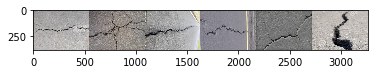

cnt: 1


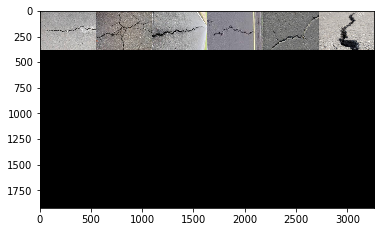

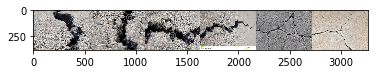

cnt: 2
num: 1


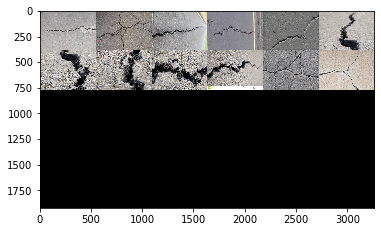

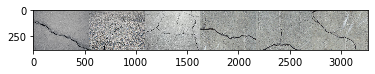

cnt: 3
num: 2


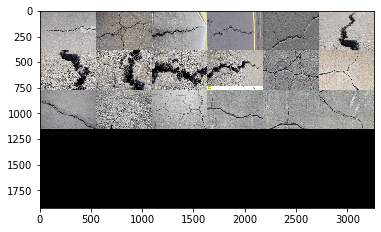

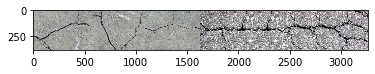

cnt: 4
num: 3


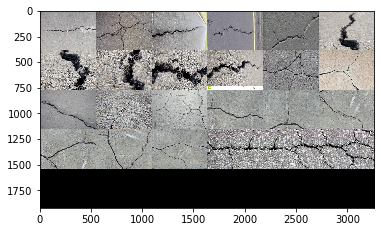

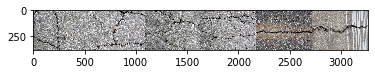

cnt: 5
num: 4


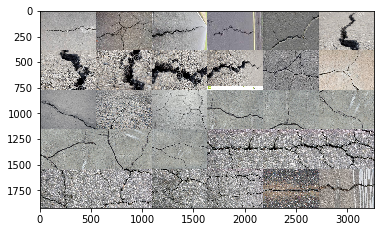

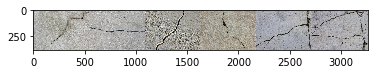

cnt: 6
num: 5


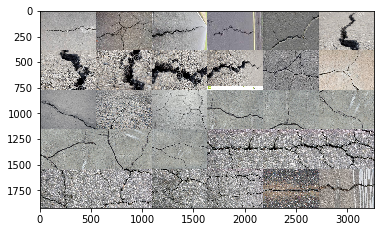

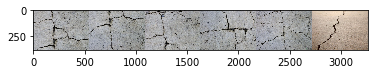

cnt: 7
num: 6


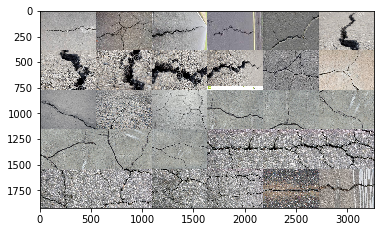

In [7]:
img_path_list = "/src/data/crack/DeepCrack/train/train_img"
print(type(img_path_list))
img_file_list = [img_file for img_file in os.listdir(img_path_list) if img_file.endswith('.jpg') or img_file.endswith('.png')]
img_file_list.sort()

img_list = []
for img_file in img_file_list:
    img_path = "/".join([img_path_list, img_file])
    
    pil_img = Image.open(img_path)
    
    img_list.append(pil_img)
    
get_concat_tile_repeat(img_list).save('/src/hyebin/preprocessing/test_img/test/test.jpg')